In [2]:
import treecorr
import matplotlib
%matplotlib inline

import pickle as pk
import numpy as np
import matplotlib.pyplot as pl
pl.rc('text', usetex=False)
# Palatino
pl.rc('font', family='DejaVu Sans')
%load_ext autoreload
%autoreload 2



In [3]:
ldir = '/mnt/home/spandey/ceph/Quijote/Simon_data/'
df_halos = np.loadtxt(ldir + '5e13mvir_halos.csv', skiprows=1)
# df_halos.shape
xh, yh, zh = df_halos[:,1], df_halos[:,2], df_halos[:,3]
lgMh = np.log10(df_halos[:,4])
indsel = np.where(lgMh > 14.0)[0]
xh, yh, zh = xh[indsel], yh[indsel], zh[indsel]
xh.shape


(45710,)

In [4]:
df_m_simon = np.loadtxt(ldir + 'delta_cat_ngrid_128.csv', skiprows=1)
xm_simon, ym_simon, zm_simon = df_m_simon[:,1], df_m_simon[:,2], df_m_simon[:,3]
deltam_simon = df_m_simon[:,4]



In [5]:
df_m_pylians = np.loadtxt(ldir + 'delta_pylians_cat_ngrid_128.csv', skiprows=1)
xm_pylians, ym_pylians, zm_pylians = df_m_pylians[:,1], df_m_pylians[:,2], df_m_pylians[:,3]
deltam_pylians = df_m_pylians[:,4]


In [6]:
xhmin, xhmax = 0, 1000
nrand = 5*len(xh)
xrand = np.random.uniform(xhmin, xhmax, nrand)
yrand = np.random.uniform(xhmin, xhmax, nrand)
zrand = np.random.uniform(xhmin, xhmax, nrand)


In [7]:
cat_h = treecorr.Catalog(x=xh, y=yh, z=zh)
cat_r = treecorr.Catalog(x=xrand, y=yrand, z=zrand)
cat_m_simon = treecorr.Catalog(x=xm_simon, y=ym_simon, z=zm_simon, k=deltam_simon)
cat_m_pylians = treecorr.Catalog(x=xm_pylians, y=ym_pylians, z=zm_pylians, k=deltam_pylians)


In [8]:
nk_hs = treecorr.NKCorrelation(nbins = 15, min_sep = 2, max_sep = 100)
nk_hp = treecorr.NKCorrelation(nbins = 15, min_sep = 2, max_sep = 100)
rk_hs = treecorr.NKCorrelation(nbins = 15, min_sep = 2, max_sep = 100)
rk_hp = treecorr.NKCorrelation(nbins = 15, min_sep = 2, max_sep = 100)



In [9]:
nk_hs.process(cat_h,cat_m_simon)
rk_hs.process(cat_r,cat_m_simon)
xi_hs = nk_hs.calculateXi(rk=rk_hs)



In [10]:
nk_hp.process(cat_h,cat_m_pylians)
rk_hp.process(cat_r,cat_m_pylians)
xi_hp = nk_hp.calculateXi(rk=rk_hp)



Text(0, 0.5, '$\\xi_{h\\delta}(r)$')

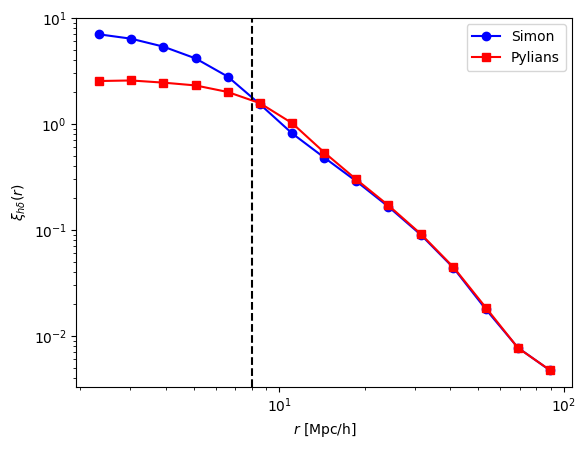

In [45]:
pl.figure()
pl.plot(nk_hs.meanr, xi_hs[0], 'bo-', label='Simon')
pl.plot(nk_hp.meanr, xi_hp[0], 'rs-', label='Pylians')
pl.xscale('log')
pl.yscale('log')
pl.legend()
pl.axvline(8.0, color='k', ls='--')
pl.xlabel(r'$r$ [Mpc/h]')
pl.ylabel(r'$\xi_{h\delta}(r)$')




(0.7, 1.3)

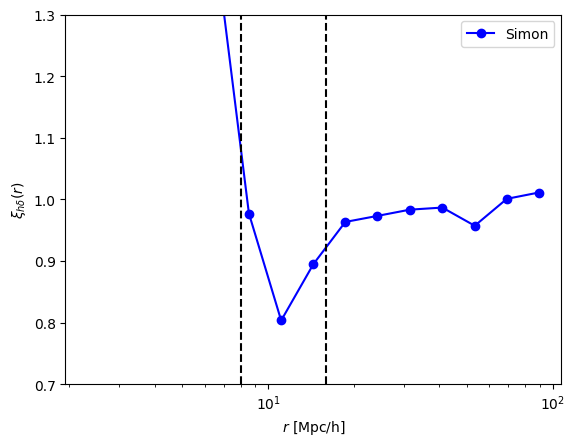

In [13]:
pl.figure()
pl.plot(nk_hs.meanr, xi_hs[0]/xi_hp[0], 'bo-', label='Simon')
# pl.plot(nk_hp.meanr, xi_hp[0], 'rs-', label='Pylians')
pl.xscale('log')
# pl.yscale('log')
pl.legend()
pl.axvline(8.0, color='k', ls='--')
pl.axvline(16.0, color='k', ls='--')
pl.xlabel(r'$r$ [Mpc/h]')
pl.ylabel(r'$\xi_{h\delta}(r)$')
pl.ylim(0.7, 1.3)



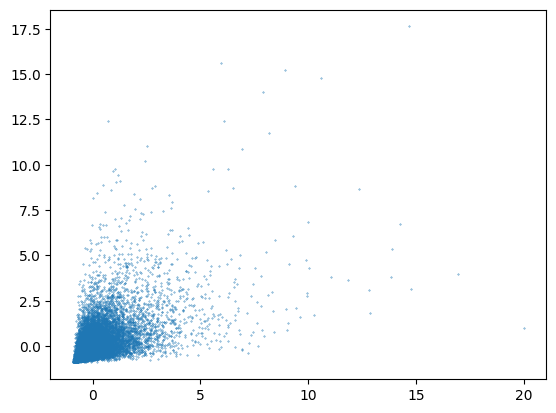

In [26]:
pl.figure()
pl.scatter(deltam_simon.flatten()[::100], deltam_pylians.flatten()[::100], s=0.1)
